we are going to work on credit data set

**Instructions**:-
Customers have been categorised as **‘good’** and **‘bad’**, based on their NPA_Status (non-performing asset status).

**Please follow the below given instructions:-**

**1.**Check the data for outliers and missing values and where found, treat them appropriately.

**2.**Prepare the data for model building.

**3.**Decide on the appropriate algorithm to segment the good and bad customers correctly so that required strategies can be built on them.

**4.**Devise the strategies you think are appropriate for the different segments of customers and share them via a presentation.

# Import Required Libraray:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

# Read Data set

In [3]:
data=pd.read_csv('creditcard.csv')
data

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN


# Find information about data set that which type of columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

# Find mean,std,count,min,max and IQR

In [6]:
data.describe()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,6.670221e+03,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387
std,0.249746,249.755371,14.771866,1.438467e+04,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,3.400000e+03,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,5.400000e+03,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.559046,63.000000,8.249000e+03,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000
max,1.000000,50708.000000,109.000000,3.008750e+06,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000


In [7]:
data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

# Check rows and columns in data set

In [8]:
data.shape

(150002, 18)

In [9]:
data.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [10]:
data.select_dtypes(include='float64').columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome.1', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

# Find mean value and fill null value with mean value

In [11]:
data['NPA Status'].std()

0.24974553092870277

In [12]:
a = data['NPA Status'].mean()
a

0.06684

In [13]:
def fun(data,var,a):
    data['NPA Status_1'] = data['NPA Status'].fillna(a)
    
fun(data,"NPA Status",a)

In [14]:
data["NPA Status"].isnull().sum()

2

In [15]:
data['NPA Status_1'].isnull().sum()

0

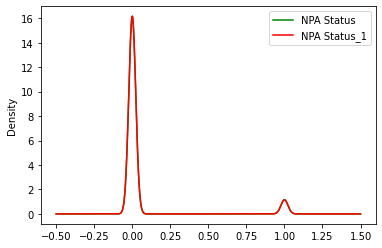

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['NPA Status'].plot(kind='kde', ax=ax,color = 'green')
data['NPA Status_1'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [17]:
data.drop(['NPA Status'],axis=1,inplace=True)

In [18]:
data.select_dtypes(object)

,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfDependents,Good_Bad
0,Male,South,Ownhouse,Self_Emp,Matric,2.0,Bad
1,Female,South,Ownhouse,Self_Emp,Graduate,1.0,Good
2,Female,South,Ownhouse,Self_Emp,PhD,0.0,Good
3,Female,South,Ownhouse,Self_Emp,Professional,0.0,Good
4,Male,South,Ownhouse,Self_Emp,Post-Grad,0.0,Good
...,...,...,...,...,...,...,...
149997,Male,North,Rented,Officer2,Professional,0,Good
149998,Male,North,Rented,Non-officer,Professional,0,Good
149999,Male,North,Ownhouse,Self_Emp,Professional,0,Good
150000,NaN,NaN,NaN,NaN,NaN,Good,NaN


In [19]:
data.select_dtypes(include='float64')

,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1
0,0.766127,45.0,9120.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,1.00000
1,0.957151,40.0,2600.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,0.00000
2,0.658180,38.0,3042.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.00000
3,0.233810,30.0,3300.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.00000
4,0.907239,49.0,63588.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
149997,0.246044,58.0,NaN,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0.00000
149998,0.000000,30.0,5716.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.00000
149999,0.850283,64.0,8158.0,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0.00000
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06684


In [20]:
data['RevolvingUtilizationOfUnsecuredLines'].mean()

6.048438058660644

In [21]:
data['RevolvingUtilizationOfUnsecuredLines'].isnull().sum()

2

In [22]:
data['RevolvingUtilizationOfUnsecuredLines'].fillna(data['RevolvingUtilizationOfUnsecuredLines'].mean(),inplace=True)

In [23]:
data['age'].fillna(data['age'].mean(),inplace=True)

In [24]:
data['MonthlyIncome.1'].isnull().sum()

29733

In [25]:
data.drop(['MonthlyIncome.1'],axis=1,inplace=True)

In [26]:
data['MonthlyIncome'].isnull().sum()

29733

In [27]:
data['MonthlyIncome'].dropna().sample()

13185    3333.0
Name: MonthlyIncome, dtype: float64

In [28]:
data['MonthlyIncome'].dropna().sample(random_state=0)

64747    2333.0
Name: MonthlyIncome, dtype: float64

In [29]:
random_value = data['MonthlyIncome'].dropna().sample(data['MonthlyIncome'].isnull().sum(),random_state=0)

In [30]:
random_value

64747     2333.0
99067     6889.0
82769     3000.0
57270     5604.0
119111    6900.0
           ...  
121555    7500.0
118377    5349.0
53153     3800.0
118340    3500.0
57303        1.0
Name: MonthlyIncome, Length: 29733, dtype: float64

In [31]:
def fun(data,var):
    data[var+"_replaced"]=data[var]
    random_value=data[var].dropna().sample(data[var].isnull().sum(),random_state=0)
    random_value.index=data[data[var].isnull()].index
    data.loc[data[var].isnull(),var+'_replaced']=random_value

In [32]:
fun(data,'MonthlyIncome')

In [33]:
data['MonthlyIncome_replaced'].isnull().sum()

0

In [34]:
data['MonthlyIncome'].std()

14384.67421528196

In [35]:
data['MonthlyIncome_replaced'].std()

15937.089248611972

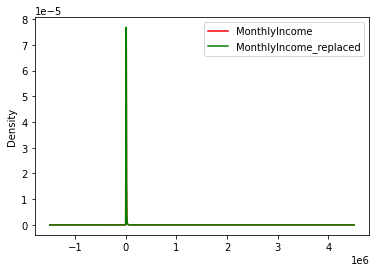

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['MonthlyIncome'].plot(kind='kde', ax=ax,color="red")
data['MonthlyIncome_replaced'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

# deleting the unnecessary columns

In [37]:
data.drop(['MonthlyIncome'],axis=1,inplace=True)

In [38]:
data.head()

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,NPA Status_1,MonthlyIncome_replaced
0,0.766127,45.0,Male,South,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,Bad,1.0,9120.0
1,0.957151,40.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,Good,0.0,2600.0
2,0.658180,38.0,Female,South,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,Good,0.0,3042.0
3,0.233810,30.0,Female,South,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,Good,0.0,3300.0
4,0.907239,49.0,Male,South,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,Good,0.0,63588.0


In [39]:
data['NumberOfTime30-59DaysPastDueNotWorse'].isnull().sum()

2

In [40]:
b = data['NumberOfTime30-59DaysPastDueNotWorse'].mean()
b

0.4210333333333333

In [41]:
data['NumberOfTime30-59DaysPastDueNotWorse'].fillna(b,inplace=True)



In [42]:
data['NumberOfTime30-59DaysPastDueNotWorse'].isnull().sum()

0

In [43]:
data['DebtRatio'].mean()

353.0050757599551

In [44]:
data['DebtRatio'].fillna(data['DebtRatio'].mean(),inplace=True)

In [45]:
data['NumberOfOpenCreditLinesAndLoans'].fillna(data['NumberOfOpenCreditLinesAndLoans'].mean(),inplace=True)

In [46]:
data['NumberOfTimes90DaysLate'].fillna(data['NumberOfTimes90DaysLate'].mean(),inplace=True)

In [47]:
data['NumberRealEstateLoansOrLines'].fillna(data['NumberRealEstateLoansOrLines'].mean(),inplace=True)

In [48]:
data['NumberOfTime60-89DaysPastDueNotWorse'].fillna(data['NumberOfTime60-89DaysPastDueNotWorse'].mean(),inplace=True)

In [49]:
data.isnull().sum()

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     2
Region                                     2
Rented_OwnHouse                            2
Occupation                                 2
Education                                  2
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
Good_Bad                                   2
NPA Status_1                               0
MonthlyIncome_replaced                     0
dtype: int64

# visualize the Non-Null Value

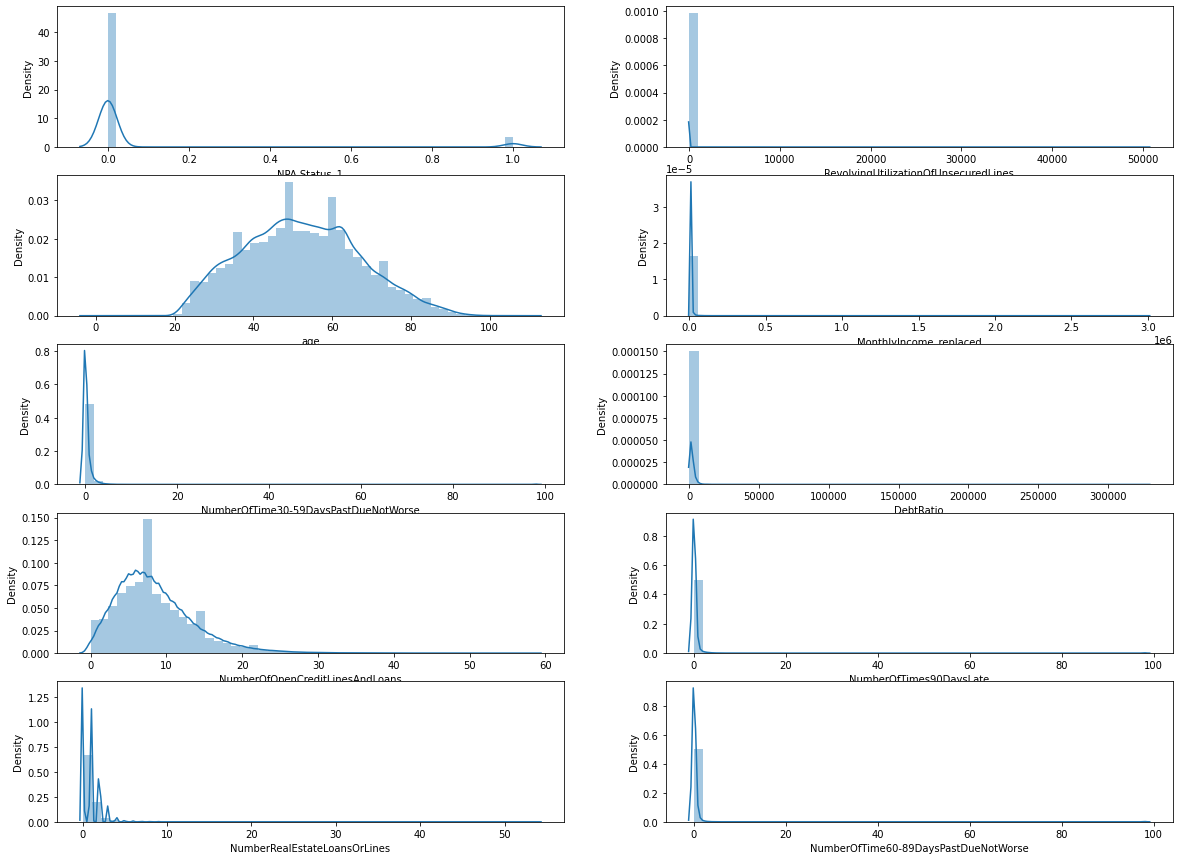

In [50]:
checking = ['NPA Status_1','RevolvingUtilizationOfUnsecuredLines','age','MonthlyIncome_replaced','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate',
           'NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse']

fig , ax = plt.subplots(5 , 2 , figsize=(20,15))
for i,subplot in zip(checking,ax.flatten()):
    sns.distplot(data[i],ax=subplot)
    
    

In [51]:
data['Gender'].isnull().sum()

2

In [52]:
data.Gender.value_counts()

Male      92304
Female    57696
Name: Gender, dtype: int64

<AxesSubplot:>

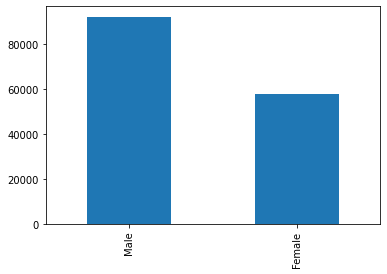

In [53]:
data.Gender.value_counts().sort_values(ascending=False).plot.bar()

In [54]:
data.Gender.mode()

0    Male
dtype: object

In [55]:
def fun1(data,var):
    de = data[var].mode()[0]
    data[var].fillna(de,inplace=True)
    
fun1(data,'Gender')

In [56]:
data.Gender.isnull().sum()

0

In [57]:
data.Region.isnull().sum()

2

<AxesSubplot:>

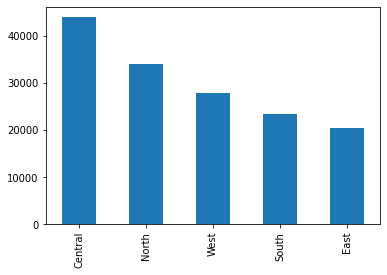

In [58]:
data.Region.value_counts().sort_values(ascending=False).plot.bar()

In [59]:
def fun2(data,var):
    de = data[var].mode()[0]
    data[var].fillna(de,inplace=True)
    
fun1(data,'Region')

In [60]:
data.Region.isnull().sum()

0

<AxesSubplot:>

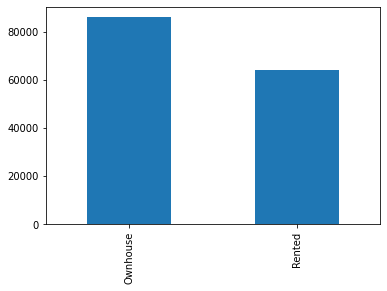

In [61]:
data.Rented_OwnHouse.value_counts().sort_values(ascending=False).plot.bar()

In [62]:
def fun3(data,var):
    de = data[var].mode()[0]
    data[var].fillna(de,inplace=True)
    
fun1(data,'Rented_OwnHouse')

In [63]:
data.Rented_OwnHouse.isnull().sum()

0

<AxesSubplot:>

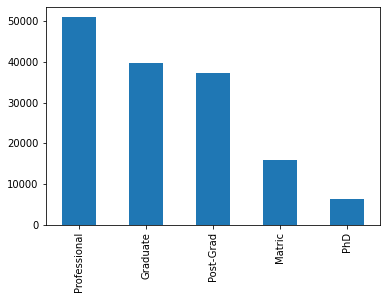

In [64]:
data.Education.value_counts().sort_values(ascending=False).plot.bar()

In [65]:
def fun4(data,var):
    de = data[var].mode()[0]
    data[var].fillna(de,inplace=True)
    
fun1(data,'Education')

In [66]:
data.Education.isnull().sum()

0

<AxesSubplot:>

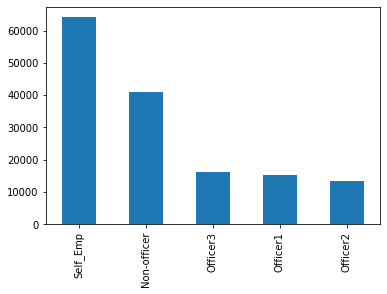

In [67]:
data.Occupation.value_counts().sort_values(ascending=False).plot.bar()

In [68]:
def fun4(data,var):
    de = data[var].mode()[0]
    data[var].fillna(de,inplace=True)
    
fun1(data,'Occupation')

In [69]:
data.Occupation.isnull().sum()

0

In [70]:
data.NumberOfDependents.isnull().sum()

3924

In [71]:
data.NumberOfDependents.shape

(150002,)

<AxesSubplot:>

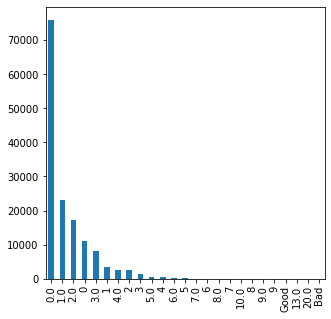

In [72]:
plt.figure(figsize=(5,5))
data.NumberOfDependents.value_counts().sort_values(ascending=False).plot.bar()

In [73]:
data.drop(['NumberOfDependents'],axis=1,inplace=True)

In [74]:
data.head()

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad,NPA Status_1,MonthlyIncome_replaced
0,0.766127,45.0,Male,South,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,Bad,1.0,9120.0
1,0.957151,40.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,Good,0.0,2600.0
2,0.658180,38.0,Female,South,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,Good,0.0,3042.0
3,0.233810,30.0,Female,South,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,Good,0.0,3300.0
4,0.907239,49.0,Male,South,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,Good,0.0,63588.0


In [75]:
data.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                2
NPA Status_1                            0
MonthlyIncome_replaced                  0
dtype: int64

In [76]:
data.Good_Bad.isnull().sum()

2

<AxesSubplot:>

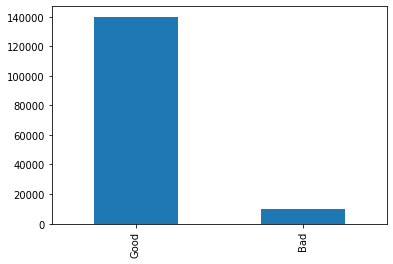

In [77]:
data.Good_Bad.value_counts().sort_values(ascending=False).plot.bar()

In [78]:
def fun4(data,var):
    de = data[var].mode()[0]
    data[var].fillna(de,inplace=True)
    
fun1(data,'Good_Bad')

In [79]:
data.Good_Bad.isnull().sum()

0

In [80]:
data.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
NPA Status_1                            0
MonthlyIncome_replaced                  0
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150002 non-null  float64
 1   age                                   150002 non-null  float64
 2   Gender                                150002 non-null  object 
 3   Region                                150002 non-null  object 
 4   Rented_OwnHouse                       150002 non-null  object 
 5   Occupation                            150002 non-null  object 
 6   Education                             150002 non-null  object 
 7   NumberOfTime30-59DaysPastDueNotWorse  150002 non-null  float64
 8   DebtRatio                             150002 non-null  float64
 9   NumberOfOpenCreditLinesAndLoans       150002 non-null  float64
 10  NumberOfTimes90DaysLate               150002 non-null  float64
 11  

In [82]:
data.head()

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad,NPA Status_1,MonthlyIncome_replaced
0,0.766127,45.0,Male,South,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,Bad,1.0,9120.0
1,0.957151,40.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,Good,0.0,2600.0
2,0.658180,38.0,Female,South,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,Good,0.0,3042.0
3,0.233810,30.0,Female,South,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,Good,0.0,3300.0
4,0.907239,49.0,Male,South,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,Good,0.0,63588.0


In [83]:
e = data.select_dtypes(include='float64')
e.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced
0,0.766127,45.0,2.0,0.802982,13.0,0.0,6.0,0.0,1.0,9120.0
1,0.957151,40.0,0.0,0.121876,4.0,0.0,0.0,0.0,0.0,2600.0
2,0.658180,38.0,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,3042.0
3,0.233810,30.0,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,3300.0
4,0.907239,49.0,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,63588.0


# Find Correlation:

In [212]:
data.corr()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.005898,-0.001314,0.003961,-0.011281,-0.001061,0.006235,-0.001048,-0.001802,0.004702
age,-0.005898,1.000000,-0.062995,0.024188,0.147705,-0.061005,0.033150,-0.057159,-0.115386,0.024652
NumberOfTime30-59DaysPastDueNotWorse,-0.001314,-0.062995,1.000000,-0.006542,-0.055312,0.983603,-0.030565,0.987005,0.125587,-0.007027
DebtRatio,0.003961,0.024188,-0.006542,1.000000,0.049565,-0.008320,0.120046,-0.007533,-0.007602,-0.003927
NumberOfOpenCreditLinesAndLoans,-0.011281,0.147705,-0.055312,0.049565,1.000000,-0.079984,0.433959,-0.071077,-0.029669,0.065019
NumberOfTimes90DaysLate,-0.001061,-0.061005,0.983603,-0.008320,-0.079984,1.000000,-0.045205,0.992796,0.117175,-0.008254
NumberRealEstateLoansOrLines,0.006235,0.033150,-0.030565,0.120046,0.433959,-0.045205,1.000000,-0.039722,-0.007038,0.090519
NumberOfTime60-89DaysPastDueNotWorse,-0.001048,-0.057159,0.987005,-0.007533,-0.071077,0.992796,-0.039722,1.000000,0.102261,-0.007220
NPA Status_1,-0.001802,-0.115386,0.125587,-0.007602,-0.029669,0.117175,-0.007038,0.102261,1.000000,-0.015689
MonthlyIncome_replaced,0.004702,0.024652,-0.007027,-0.003927,0.065019,-0.008254,0.090519,-0.007220,-0.015689,1.000000


In [213]:
data.corr(method='pearson')

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.005898,-0.001314,0.003961,-0.011281,-0.001061,0.006235,-0.001048,-0.001802,0.004702
age,-0.005898,1.000000,-0.062995,0.024188,0.147705,-0.061005,0.033150,-0.057159,-0.115386,0.024652
NumberOfTime30-59DaysPastDueNotWorse,-0.001314,-0.062995,1.000000,-0.006542,-0.055312,0.983603,-0.030565,0.987005,0.125587,-0.007027
DebtRatio,0.003961,0.024188,-0.006542,1.000000,0.049565,-0.008320,0.120046,-0.007533,-0.007602,-0.003927
NumberOfOpenCreditLinesAndLoans,-0.011281,0.147705,-0.055312,0.049565,1.000000,-0.079984,0.433959,-0.071077,-0.029669,0.065019
NumberOfTimes90DaysLate,-0.001061,-0.061005,0.983603,-0.008320,-0.079984,1.000000,-0.045205,0.992796,0.117175,-0.008254
NumberRealEstateLoansOrLines,0.006235,0.033150,-0.030565,0.120046,0.433959,-0.045205,1.000000,-0.039722,-0.007038,0.090519
NumberOfTime60-89DaysPastDueNotWorse,-0.001048,-0.057159,0.987005,-0.007533,-0.071077,0.992796,-0.039722,1.000000,0.102261,-0.007220
NPA Status_1,-0.001802,-0.115386,0.125587,-0.007602,-0.029669,0.117175,-0.007038,0.102261,1.000000,-0.015689
MonthlyIncome_replaced,0.004702,0.024652,-0.007027,-0.003927,0.065019,-0.008254,0.090519,-0.007220,-0.015689,1.000000


In [214]:
data.corr(method='spearman')

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.278332,0.234403,0.076587,-0.086596,0.237727,-0.027286,0.187656,0.240432,-0.058046
age,-0.278332,1.000000,-0.094644,0.029384,0.158061,-0.104035,0.054217,-0.085389,-0.117022,0.099716
NumberOfTime30-59DaysPastDueNotWorse,0.234403,-0.094644,1.000000,0.038150,0.063992,0.252793,0.022276,0.279870,0.257470,-0.012735
DebtRatio,0.076587,0.029384,0.038150,1.000000,0.226762,-0.031899,0.400243,0.001324,0.020651,-0.088025
NumberOfOpenCreditLinesAndLoans,-0.086596,0.158061,0.063992,0.226762,1.000000,-0.134547,0.472817,-0.048004,-0.038572,0.245989
NumberOfTimes90DaysLate,0.237727,-0.104035,0.252793,-0.031899,-0.134547,1.000000,-0.101418,0.321116,0.342467,-0.070996
NumberRealEstateLoansOrLines,-0.027286,0.054217,0.022276,0.400243,0.472817,-0.101418,1.000000,-0.044341,-0.034077,0.314805
NumberOfTime60-89DaysPastDueNotWorse,0.187656,-0.085389,0.279870,0.001324,-0.048004,0.321116,-0.044341,1.000000,0.277247,-0.042996
NPA Status_1,0.240432,-0.117022,0.257470,0.020651,-0.038572,0.342467,-0.034077,0.277247,1.000000,-0.055903
MonthlyIncome_replaced,-0.058046,0.099716,-0.012735,-0.088025,0.245989,-0.070996,0.314805,-0.042996,-0.055903,1.000000


In [84]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
eData = pd.DataFrame(scalar.fit_transform(e),columns=e.columns)
eData.head() 

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced
0,-0.021150,-0.493863,0.376595,-0.172835,0.883663,-0.063794,4.409575,-0.057853,3.736481,0.151761
1,-0.020385,-0.832348,-0.100420,-0.173169,-0.865303,-0.063794,-0.901289,-0.057853,-0.267635,-0.257349
2,-0.021582,-0.967742,0.138088,-0.173187,-1.253962,0.176057,-0.901289,-0.057853,-0.267635,-0.229615
3,-0.023282,-1.509317,-0.100420,-0.173211,-0.670973,-0.063794,-0.901289,-0.057853,-0.267635,-0.213427
4,-0.020585,-0.223075,0.138088,-0.173216,-0.282314,-0.063794,-0.016145,-0.057853,-0.267635,3.569460


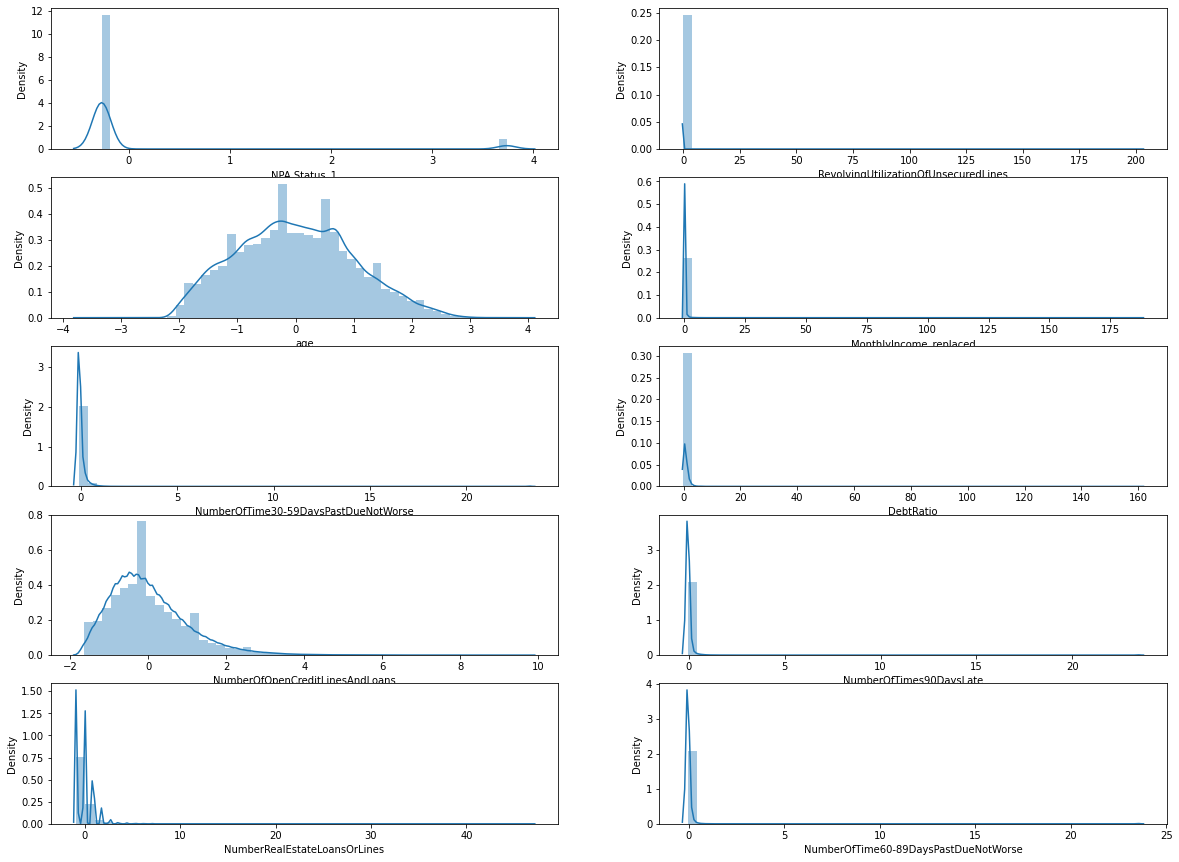

In [85]:
checking1 = ['NPA Status_1','RevolvingUtilizationOfUnsecuredLines','age','MonthlyIncome_replaced','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate',
           'NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse']

fig , ax = plt.subplots(5 , 2 , figsize=(20,15))
for i1,subplot in zip(checking1,ax.flatten()):
    sns.distplot(eData[i1],ax=subplot)
    
    

<AxesSubplot:>

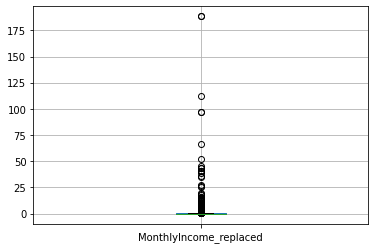

In [86]:
eData.boxplot(column='MonthlyIncome_replaced')

In [87]:
eData['MonthlyIncome_replaced'] = np.log(eData['MonthlyIncome_replaced']+1)

<AxesSubplot:>

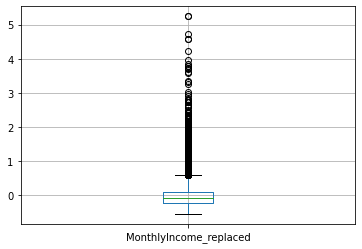

In [88]:
eData.boxplot(column='MonthlyIncome_replaced')

array([[<AxesSubplot:title={'center':'MonthlyIncome_replaced'}>]],
      dtype=object)

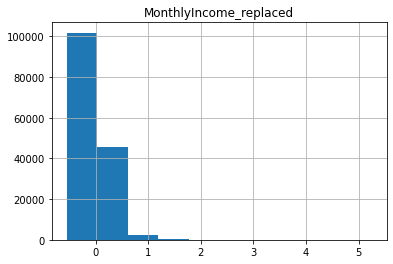

In [89]:
eData.hist(column='MonthlyIncome_replaced')

<AxesSubplot:>

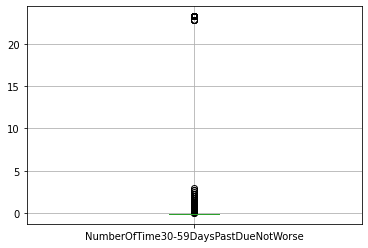

In [90]:
eData.boxplot(column='NumberOfTime30-59DaysPastDueNotWorse')

In [91]:
eData['NumberOfTime30-59DaysPastDueNotWorse'] = np.log(eData['NumberOfTime30-59DaysPastDueNotWorse']+1)

<AxesSubplot:>

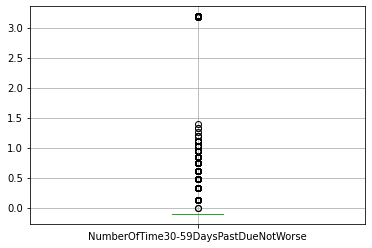

In [92]:
eData.boxplot(column='NumberOfTime30-59DaysPastDueNotWorse')

In [93]:
higher_Range1 = eData['NumberOfOpenCreditLinesAndLoans'].mean() + 3*eData['NumberOfOpenCreditLinesAndLoans'].std()
lower_Range1 = eData['NumberOfOpenCreditLinesAndLoans'].mean() + 3*eData['NumberOfOpenCreditLinesAndLoans'].std()

In [94]:
print(higher_Range1)
print(lower_Range1)

3.0000099999165495
3.0000099999165495


In [95]:
eData.loc[eData['NumberOfOpenCreditLinesAndLoans']>=3,'NumberOfOpenCreditLinesAndLoans'] = 3


<AxesSubplot:>

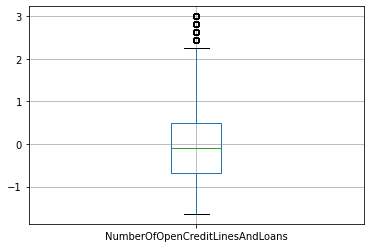

In [96]:
eData.boxplot(column='NumberOfOpenCreditLinesAndLoans')

array([[<AxesSubplot:title={'center':'NumberOfOpenCreditLinesAndLoans'}>]],
      dtype=object)

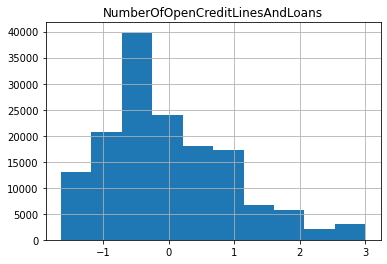

In [97]:
eData.hist(column='NumberOfOpenCreditLinesAndLoans',bins=10)

In [98]:
IQR3 = eData['NumberRealEstateLoansOrLines'].quantile(0.75) - eData['NumberRealEstateLoansOrLines'].quantile(0.25)
IQR3

1.770287984728785

In [99]:
high = eData['NumberRealEstateLoansOrLines'].quantile(0.75) + (IQR3*3)
low = eData['NumberRealEstateLoansOrLines'].quantile(0.75) - (IQR3*3)

In [100]:
print(high)
print(low)

6.17986292013002
-4.441864988242688


In [101]:
eData.loc[eData['NumberRealEstateLoansOrLines']>=6,'NumberRealEstateLoansOrLines'] = 6
eData.loc[eData['NumberRealEstateLoansOrLines']<=-4,'NumberRealEstateLoansOrLines'] = -4

<AxesSubplot:>

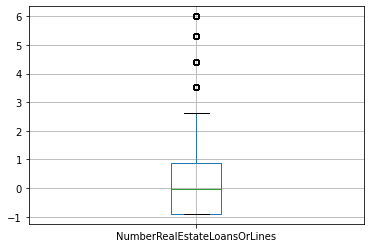

In [102]:
eData.boxplot(column='NumberRealEstateLoansOrLines')

array([[<AxesSubplot:title={'center':'NumberRealEstateLoansOrLines'}>]],
      dtype=object)

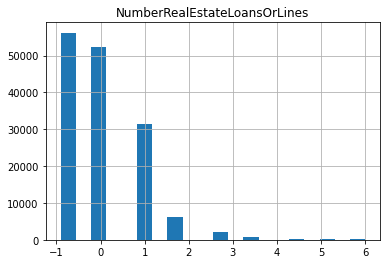

In [103]:
eData.hist(column='NumberRealEstateLoansOrLines',bins=20)

In [104]:
higher_range = eData['age'].mean() + 3*eData['age'].std()
lower_range = eData['age'].mean() - 3*eData['age'].std()
print(higher_range)
print(lower_range)

3.000009999916969
-3.000009999916969


In [105]:
eData.loc[eData['age']>=3,'age']=3

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

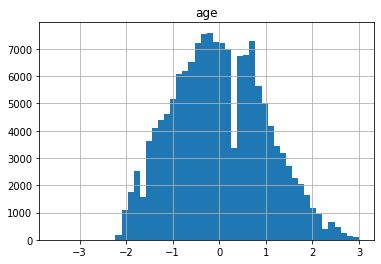

In [106]:
eData.hist(column='age',bins=50)

<AxesSubplot:>

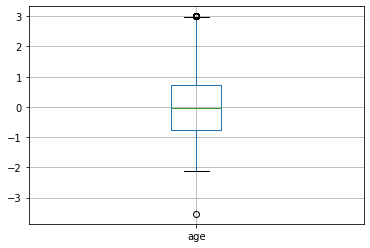

In [107]:
eData.boxplot(column='age')

In [108]:
eData['DebtRatio'] = np.log(eData['DebtRatio']+1)

<AxesSubplot:>

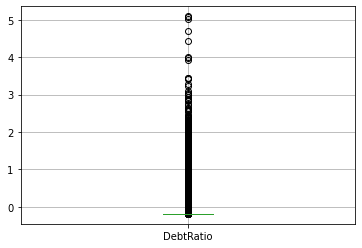

In [109]:
eData.boxplot(column='DebtRatio')

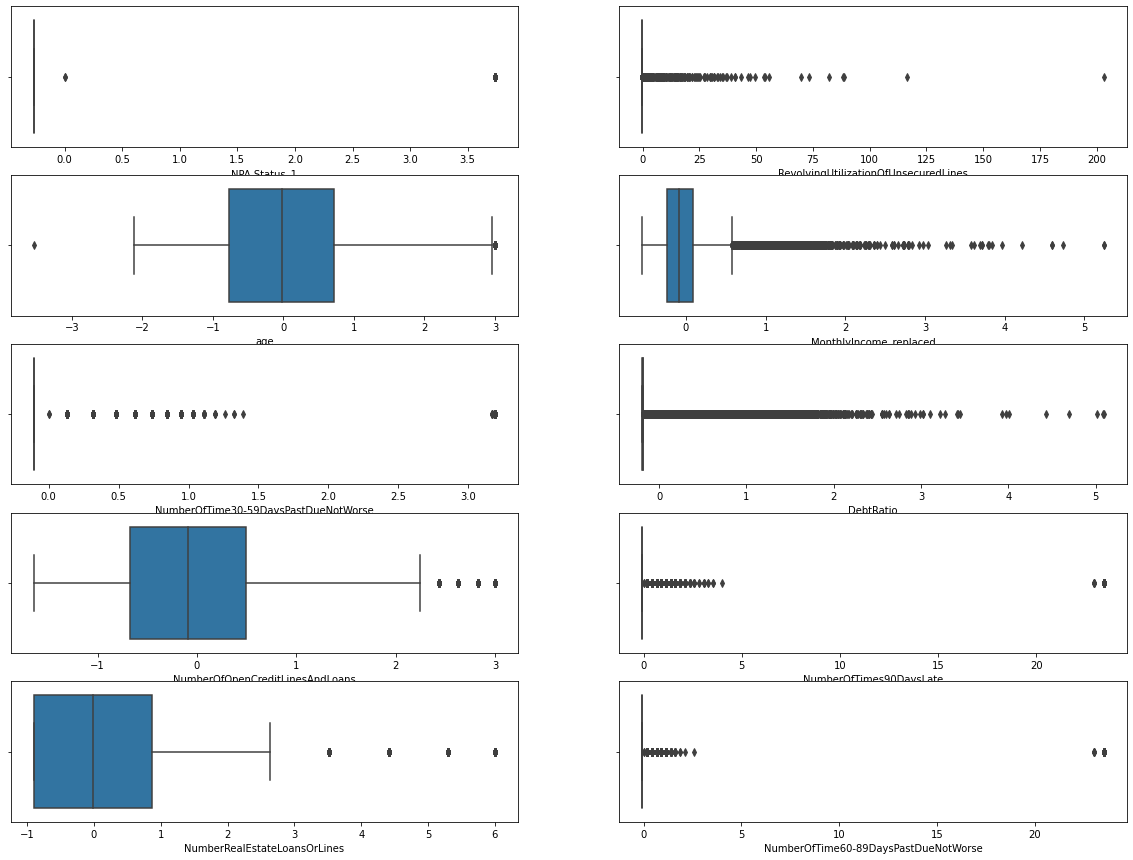

In [110]:
checking3 = ['NPA Status_1','RevolvingUtilizationOfUnsecuredLines','age','MonthlyIncome_replaced','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate',
           'NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse']

fig , ax = plt.subplots(5 , 2 , figsize=(20,15))
for i2,subplot in zip(checking1,ax.flatten()):
    sns.boxplot(eData[i2],ax=subplot)
    

In [111]:
eData.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NPA Status_1', 'MonthlyIncome_replaced'],
      dtype='object')

In [112]:
numerical_Features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NPA Status_1', 'MonthlyIncome_replaced']

In [113]:
b1=data.select_dtypes(object)

In [114]:
b1.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
0,Male,South,Ownhouse,Self_Emp,Matric,Bad
1,Female,South,Ownhouse,Self_Emp,Graduate,Good
2,Female,South,Ownhouse,Self_Emp,PhD,Good
3,Female,South,Ownhouse,Self_Emp,Professional,Good
4,Male,South,Ownhouse,Self_Emp,Post-Grad,Good


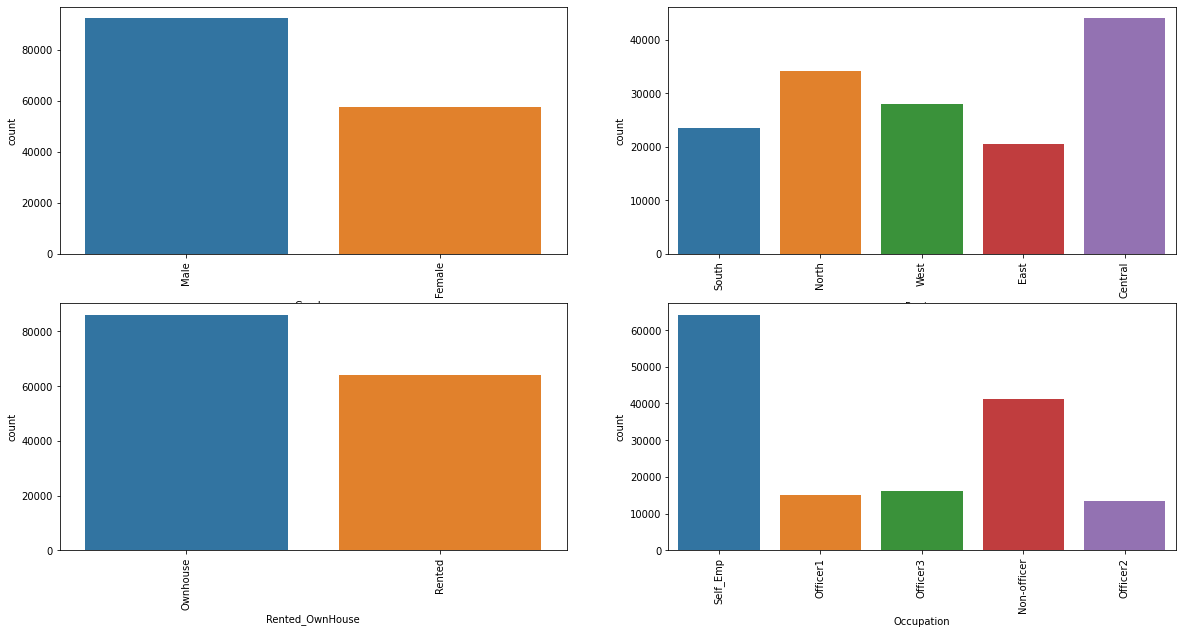

In [115]:
col2=['Gender','Region','Rented_OwnHouse','Occupation']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for var, subplot in zip(col2, ax.flatten()):
    sns.countplot(b1[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [116]:
b1['Good_Bad'].replace({'Good':1,'Bad':0},inplace=True)

In [117]:
b1.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
0,Male,South,Ownhouse,Self_Emp,Matric,0
1,Female,South,Ownhouse,Self_Emp,Graduate,1
2,Female,South,Ownhouse,Self_Emp,PhD,1
3,Female,South,Ownhouse,Self_Emp,Professional,1
4,Male,South,Ownhouse,Self_Emp,Post-Grad,1


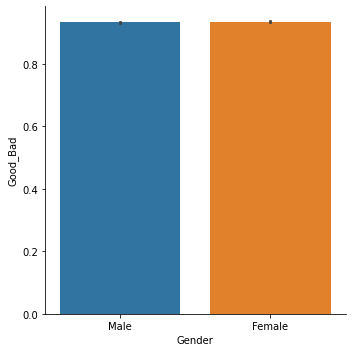

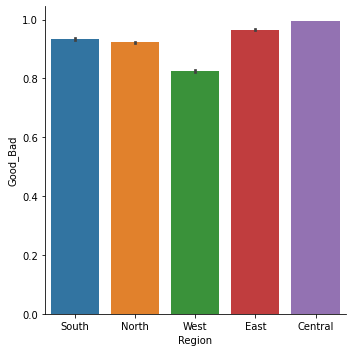

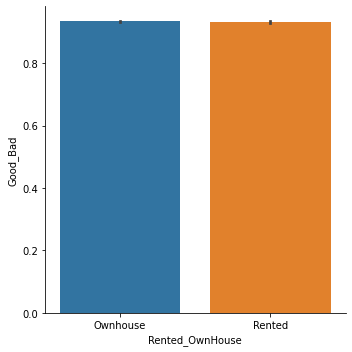

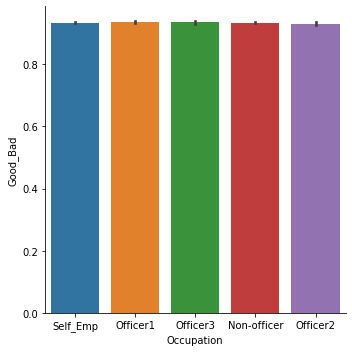

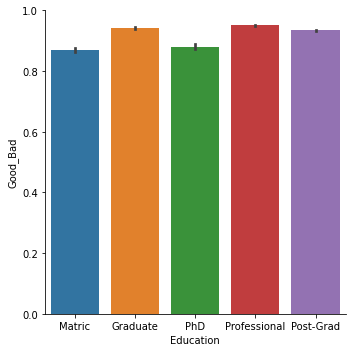

In [118]:
col1=['Gender','Region','Rented_OwnHouse','Occupation','Education']
for var in col1:
    sns.catplot(x=var, y='Good_Bad',kind='bar',data=b1)

# Create a dummies variable

In [119]:
Gender_dummy = pd.get_dummies(b1['Gender'],drop_first=True)
Region_dummy = pd.get_dummies(b1['Region'],drop_first=True)
Rented_OwnHouse_dummy = pd.get_dummies(b1['Rented_OwnHouse'],drop_first=True)
Occupation_Dummy = pd.get_dummies(b1['Occupation'],drop_first=True)


In [120]:
Gender_dummy.head()

,Male
0,1
1,0
2,0
3,0
4,1


In [121]:
Region_dummy.head()

,East,North,South,West
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [122]:
Rented_OwnHouse_dummy.head()

,Rented
0,0
1,0
2,0
3,0
4,0


In [123]:
Occupation_Dummy.head()

,Officer1,Officer2,Officer3,Self_Emp
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [124]:
b1.Region.value_counts()

Central    43958
North      34099
West       27899
South      23495
East       20551
Name: Region, dtype: int64

In [125]:
y = b1['Good_Bad']

In [126]:
b1.drop(['Good_Bad'],axis=1,inplace=True)

In [127]:
b1.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education
0,Male,South,Ownhouse,Self_Emp,Matric
1,Female,South,Ownhouse,Self_Emp,Graduate
2,Female,South,Ownhouse,Self_Emp,PhD
3,Female,South,Ownhouse,Self_Emp,Professional
4,Male,South,Ownhouse,Self_Emp,Post-Grad


In [128]:
b1.drop(['Gender','Region','Rented_OwnHouse','Occupation'],axis=1,inplace=True)

In [129]:
b1.head()

,Education
0,Matric
1,Graduate
2,PhD
3,Professional
4,Post-Grad


# Encode the categorical data to numerical:

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
lb = LabelEncoder()

In [132]:
b1 = b1.apply(lb.fit_transform)

In [133]:
b1.head()

,Education
0,1
1,0
2,2
3,4
4,3


In [134]:
b1 = pd.concat([b1,Gender_dummy,Region_dummy,Rented_OwnHouse_dummy,Occupation_Dummy],axis=1,)

In [135]:
b1.head()

,Education,Male,East,North,South,West,Rented,Officer1,Officer2,Officer3,Self_Emp
0,1,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,1
4,3,1,0,0,1,0,0,0,0,0,1


In [136]:
X = b1.iloc[:,0:]

In [137]:
from sklearn.feature_selection import chi2
chi_squares = chi2(X,y)

In [138]:
chi_squares

(array([2.18907731e+02, 1.35577727e+00, 3.49803704e+02, 6.05487098e+01,
        1.78015120e-03, 5.15575167e+03, 7.34176938e-01, 6.90114613e-01,
        1.81348021e+00, 2.14039167e-01, 7.57934111e-02]),
 array([1.56544549e-49, 2.44270661e-01, 4.67612254e-78, 7.17801243e-15,
        9.66345769e-01, 0.00000000e+00, 3.91532622e-01, 4.06125399e-01,
        1.78091309e-01, 6.43619800e-01, 7.83081131e-01]))

In [139]:
p_values = pd.Series(chi_squares[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)

<AxesSubplot:>

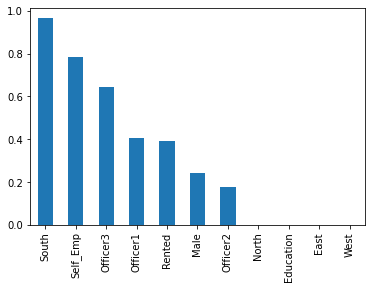

In [140]:
p_values.plot.bar()

In [141]:
p_values

South        9.663458e-01
Self_Emp     7.830811e-01
Officer3     6.436198e-01
Officer1     4.061254e-01
Rented       3.915326e-01
Male         2.442707e-01
Officer2     1.780913e-01
North        7.178012e-15
Education    1.565445e-49
East         4.676123e-78
West         0.000000e+00
dtype: float64

In [142]:
for h,l in enumerate(p_values):
    if l > 0.05:
        print(h)
    
    

0
1
2
3
4
5
6


In [143]:
categorical_features = ['Education','East','North','West']

In [144]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Good_Bad, dtype: int64

In [145]:
y.value_counts()

1    139976
0     10026
Name: Good_Bad, dtype: int64

In [146]:
numerical_Features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NPA Status_1',
 'MonthlyIncome_replaced']

In [147]:
y.isnull().sum()

0

In [148]:
eData.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced
0,-0.021150,-0.493863,0.319613,-0.189751,0.883663,-0.063794,4.409575,-0.057853,3.736481,0.141292
1,-0.020385,-0.832348,-0.105827,-0.190155,-0.865303,-0.063794,-0.901289,-0.057853,-0.267635,-0.297530
2,-0.021582,-0.967742,0.129350,-0.190177,-1.253962,0.176057,-0.901289,-0.057853,-0.267635,-0.260865
3,-0.023282,-1.509317,-0.105827,-0.190206,-0.670973,-0.063794,-0.901289,-0.057853,-0.267635,-0.240069
4,-0.020585,-0.223075,0.129350,-0.190212,-0.282314,-0.063794,-0.016145,-0.057853,-0.267635,1.519395


In [149]:
from scipy.stats import pearsonr
corr = []
for m in numerical_Features:
    x3 = pearsonr(eData[m],y)
    corr.append(x3)
corr

[(0.0018015016899960196, 0.4853535643026064),
 (0.11540803629610613, 0.0),
 (-0.25247611672203585, 0.0),
 (0.018171437307352517, 1.9454805527578103e-12),
 (0.031527250737240574, 2.634194006379469e-34),
 (-0.11717455749144488, 0.0),
 (0.010492943711759167, 4.823784981036807e-05),
 (-0.10226081221970146, 0.0),
 (-0.9999995224893048, 0.0),
 (0.04688370803283899, 9.260744033751744e-74)]

In [150]:
x4 = np.array(corr)
p_values2 = pd.Series(x4[:,1],index=eData.columns)
p_values2.sort_values(ascending=False,inplace=True)

<AxesSubplot:>

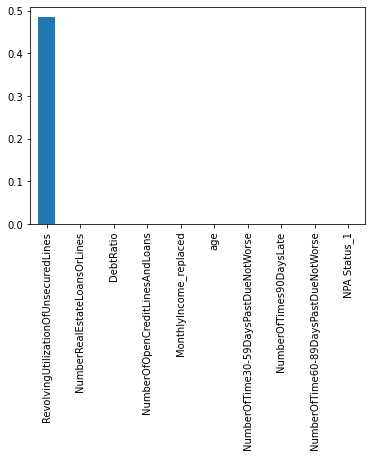

In [151]:
p_values2.plot.bar()

In [152]:
p_values2

RevolvingUtilizationOfUnsecuredLines    4.853536e-01
NumberRealEstateLoansOrLines            4.823785e-05
DebtRatio                               1.945481e-12
NumberOfOpenCreditLinesAndLoans         2.634194e-34
MonthlyIncome_replaced                  9.260744e-74
age                                     0.000000e+00
NumberOfTime30-59DaysPastDueNotWorse    0.000000e+00
NumberOfTimes90DaysLate                 0.000000e+00
NumberOfTime60-89DaysPastDueNotWorse    0.000000e+00
NPA Status_1                            0.000000e+00
dtype: float64

In [153]:
for columns,values in enumerate(p_values2):
    if values > 0.05:
        print(columns)

0


In [154]:
p_values2.drop(['RevolvingUtilizationOfUnsecuredLines'],inplace=True)

In [155]:
p_values2

NumberRealEstateLoansOrLines            4.823785e-05
DebtRatio                               1.945481e-12
NumberOfOpenCreditLinesAndLoans         2.634194e-34
MonthlyIncome_replaced                  9.260744e-74
age                                     0.000000e+00
NumberOfTime30-59DaysPastDueNotWorse    0.000000e+00
NumberOfTimes90DaysLate                 0.000000e+00
NumberOfTime60-89DaysPastDueNotWorse    0.000000e+00
NPA Status_1                            0.000000e+00
dtype: float64

In [156]:
b1.drop(['Male','South','Rented','Officer1','Officer2','Officer3','Self_Emp'],axis=1,inplace=True)

In [157]:
b1.head()

,Education,East,North,West
0,1,0,0,0
1,0,0,0,0
2,2,0,0,0
3,4,0,0,0
4,3,0,0,0


In [158]:
eData.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced
0,-0.021150,-0.493863,0.319613,-0.189751,0.883663,-0.063794,4.409575,-0.057853,3.736481,0.141292
1,-0.020385,-0.832348,-0.105827,-0.190155,-0.865303,-0.063794,-0.901289,-0.057853,-0.267635,-0.297530
2,-0.021582,-0.967742,0.129350,-0.190177,-1.253962,0.176057,-0.901289,-0.057853,-0.267635,-0.260865
3,-0.023282,-1.509317,-0.105827,-0.190206,-0.670973,-0.063794,-0.901289,-0.057853,-0.267635,-0.240069
4,-0.020585,-0.223075,0.129350,-0.190212,-0.282314,-0.063794,-0.016145,-0.057853,-0.267635,1.519395


In [159]:
eData.drop(['RevolvingUtilizationOfUnsecuredLines'],axis=1,inplace=True)

In [160]:
eData.head()

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced
0,-0.493863,0.319613,-0.189751,0.883663,-0.063794,4.409575,-0.057853,3.736481,0.141292
1,-0.832348,-0.105827,-0.190155,-0.865303,-0.063794,-0.901289,-0.057853,-0.267635,-0.297530
2,-0.967742,0.129350,-0.190177,-1.253962,0.176057,-0.901289,-0.057853,-0.267635,-0.260865
3,-1.509317,-0.105827,-0.190206,-0.670973,-0.063794,-0.901289,-0.057853,-0.267635,-0.240069
4,-0.223075,0.129350,-0.190212,-0.282314,-0.063794,-0.016145,-0.057853,-0.267635,1.519395


In [161]:
Data = pd.concat([eData,b1,y],axis=1)

In [162]:
Data.head()

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced,Education,East,North,West,Good_Bad
0,-0.493863,0.319613,-0.189751,0.883663,-0.063794,4.409575,-0.057853,3.736481,0.141292,1,0,0,0,0
1,-0.832348,-0.105827,-0.190155,-0.865303,-0.063794,-0.901289,-0.057853,-0.267635,-0.297530,0,0,0,0,1
2,-0.967742,0.129350,-0.190177,-1.253962,0.176057,-0.901289,-0.057853,-0.267635,-0.260865,2,0,0,0,1
3,-1.509317,-0.105827,-0.190206,-0.670973,-0.063794,-0.901289,-0.057853,-0.267635,-0.240069,4,0,0,0,1
4,-0.223075,0.129350,-0.190212,-0.282314,-0.063794,-0.016145,-0.057853,-0.267635,1.519395,3,0,0,0,1


<AxesSubplot:xlabel='Good_Bad', ylabel='count'>

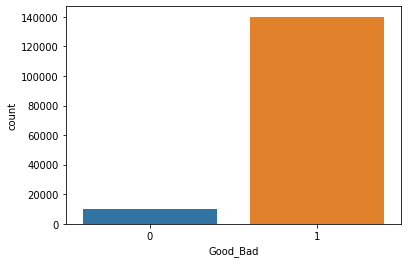

In [163]:
sns.countplot(y)

In [164]:
X_value = Data.drop(['Good_Bad'],axis=1)

In [165]:
X_value.head()

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced,Education,East,North,West
0,-0.493863,0.319613,-0.189751,0.883663,-0.063794,4.409575,-0.057853,3.736481,0.141292,1,0,0,0
1,-0.832348,-0.105827,-0.190155,-0.865303,-0.063794,-0.901289,-0.057853,-0.267635,-0.297530,0,0,0,0
2,-0.967742,0.129350,-0.190177,-1.253962,0.176057,-0.901289,-0.057853,-0.267635,-0.260865,2,0,0,0
3,-1.509317,-0.105827,-0.190206,-0.670973,-0.063794,-0.901289,-0.057853,-0.267635,-0.240069,4,0,0,0
4,-0.223075,0.129350,-0.190212,-0.282314,-0.063794,-0.016145,-0.057853,-0.267635,1.519395,3,0,0,0


In [166]:
y = Data['Good_Bad']

In [167]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Good_Bad, dtype: int64

# Model train:

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_value, y, test_size=0.2, random_state=42)

In [169]:
X_train.head()

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced,Education,East,North,West
135316,-0.087682,0.129350,-0.189910,0.300674,-0.063794,0.868999,0.664145,3.736481,0.003046,4,0,0,1
16615,-0.426166,-0.105827,-0.190215,-1.448291,-0.063794,-0.901289,-0.057853,-0.267635,-0.130542,3,0,1,0
55543,-0.426166,-0.105827,0.716955,1.466651,-0.063794,0.868999,-0.057853,-0.267635,-0.095487,4,1,0,0
41881,-0.358469,-0.105827,0.901519,0.106345,-0.063794,0.868999,-0.057853,-0.267635,-0.272498,3,0,1,0
107402,0.386197,-0.105827,-0.189875,-0.087985,-0.063794,0.868999,-0.057853,-0.267635,-0.224241,1,0,0,0


In [170]:
y_train.head()

135316    0
16615     1
55543     1
41881     1
107402    1
Name: Good_Bad, dtype: int64

In [171]:
y_train.value_counts()

1    111908
0      8093
Name: Good_Bad, dtype: int64

In [172]:
X_test.head()

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NPA Status_1,MonthlyIncome_replaced,Education,East,North,West
144114,-1.238529,-0.105827,-0.182541,-0.670973,-0.063794,-0.901289,-0.057853,-0.267635,-0.173268,4,0,0,0
85944,0.792379,-0.105827,-0.189899,-0.087985,-0.063794,1.754143,-0.057853,-0.267635,-0.112896,0,0,0,0
27323,1.130863,-0.105827,-0.190079,3.000000,-0.063794,0.868999,-0.057853,-0.267635,0.334444,0,0,1,0
87577,0.521591,-0.105827,-0.190189,0.883663,-0.063794,-0.016145,-0.057853,-0.267635,-0.045008,0,0,0,0
9774,0.589288,0.129350,0.433878,-1.059632,-0.063794,-0.016145,-0.057853,-0.267635,-0.466096,1,0,0,0


In [173]:
y_test.head()

144114    1
85944     1
27323     1
87577     1
9774      1
Name: Good_Bad, dtype: int64

In [174]:
y_test.value_counts()


1    28068
0     1933
Name: Good_Bad, dtype: int64

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [176]:
ran = RandomForestClassifier(n_estimators=100)
ran.fit(X_train,y_train)


RandomForestClassifier()

In [177]:
ran.score(X_train,y_train)

1.0

In [178]:
ran.score(X_test,y_test)

1.0

In [179]:
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [180]:
dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [181]:
y_train_pred = dec.predict(X_train)

In [182]:
y_test_pred = dec.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [184]:
accuracy_score(y_test,y_test_pred)

1.0

# ADA BOOST


In [185]:
from sklearn.ensemble import AdaBoostClassifier


In [186]:
ABC = AdaBoostClassifier()
ABC.fit(X_train,y_train)
y_pred = ABC.predict(X_test)
score =accuracy_score(y_test, y_pred)
score 

1.0

# GRADIENT BOOST

In [187]:
from sklearn.ensemble import GradientBoostingClassifier

In [188]:
gra = GradientBoostingClassifier()
gra.fit(X_train,y_train)

GradientBoostingClassifier()

In [189]:
y_test_pred = gra.predict(X_test)
accuracy_score(y_test,y_test_pred)


1.0

In [190]:
y_train_pred = gra.predict(X_train)


In [191]:
accuracy_score(y_train,y_train_pred)

1.0

# SVM

In [192]:
from sklearn.svm import SVC

In [193]:
svm = SVC()

In [194]:
svm.fit(X_train,y_train)

SVC()

In [195]:
svm.score(X_test,y_test)

1.0

In [196]:
svm.score(X_train,y_train)

1.0

# KNN

In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
knn =KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [199]:
y_test_pred = knn.predict(X_test)
accuracy_score(y_test,y_test_pred)

1.0

# RANDOM FOREST

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
ran = RandomForestClassifier()

In [202]:
ran.fit(X_train,y_train)

RandomForestClassifier()

In [203]:
ran.score(X_train,y_train)

1.0

In [204]:
ran.score(X_test,y_test)

1.0

# DECISION TREE

In [205]:
from sklearn.tree import DecisionTreeClassifier

In [206]:
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [207]:
y_test_pred = dec.predict(X_test)
accuracy_score(y_test,y_test_pred) 

1.0

# XG BOOST

In [208]:
!pip3 install xgboost

In [209]:
import xgboost
xg= xgboost.XGBClassifier()

In [210]:
xg = xgboost.XGBClassifier()
xg.fit(X_train,y_train)

[12:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [211]:
y_test_pred = xg.predict(X_test)
accuracy_score(y_test,y_test_pred)

1.0